<a href="https://colab.research.google.com/github/chefhaider/Checkers-Min-MAX-with-multiprocessing/blob/main/Copy_of_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [421]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [422]:
import pandas as pd
import requests

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [423]:
df = pd.read_csv('https://raw.githubusercontent.com/chefhaider/Fake-News-Detection-Kaggle/main/train.csv')

In [424]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [425]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [426]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [427]:
len(df.location.unique())

3342

In [428]:
'''import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut


df = pd.read_csv('https://raw.githubusercontent.com/chefhaider/Fake-News-Detection-Kaggle/main/train.csv')


geolocator = Nominatim(user_agent = "geoapiExercises")
city_name = []




for val in df.location:
  if val == 'nan':
    city_name+=[' ']
    continue

  try:
    city_name+=[ geolocator.geocode(val)[-2].split(',')[-1] ]
  except TypeError:
    city_name+=[' ']
  except GeocoderTimedOut :
    city_name+=[' ']'''

'import pandas as pd\nfrom geopy.geocoders import Nominatim\nfrom geopy.exc import GeocoderTimedOut\n\n\ndf = pd.read_csv(\'https://raw.githubusercontent.com/chefhaider/Fake-News-Detection-Kaggle/main/train.csv\')\n\n\ngeolocator = Nominatim(user_agent = "geoapiExercises")\ncity_name = []\n\n\n\n\nfor val in df.location:\n  if val == \'nan\':\n    city_name+=[\' \']\n    continue\n\n  try:\n    city_name+=[ geolocator.geocode(val)[-2].split(\',\')[-1] ]\n  except TypeError:\n    city_name+=[\' \']\n  except GeocoderTimedOut :\n    city_name+=[\' \']'

In [429]:
#fig = plt.figure(figsize=(10,80))
#sns.countplot(y="keyword",order=df[df.target == 1]['keyword'].value_counts().index, hue="target",data = df)

In [430]:
df.dropna(subset = ["keyword"], inplace=True)

In [431]:
df['text'].head()

31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
32    We always try to bring the heavy. #metal #RT h...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
34                   Crying out for more! Set me ablaze
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
Name: text, dtype: object

In [432]:
import re
import string




def clean_text(text):


    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'',text)


    html=re.compile(r'<.*?>')
    text = html.sub(r'',text)



    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)


    table=str.maketrans('','',string.punctuation)
    return text.translate(table)



df['text'] = df['text'].apply(lambda x: clean_text(x))
test['text'] = test['text'].apply(lambda x: clean_text(x))

In [433]:
df.loc[df['keyword'].notnull(), 'text'] = df['keyword'] + ' ' + df['text']
test.loc[test['keyword'].notnull(), 'text'] = test['keyword'] + ' ' + test['text']


In [434]:
from sklearn.feature_extraction.text import TfidfVectorizer


tf_idf_vect = TfidfVectorizer(ngram_range=(1,3)) # one,two and three gram vectorization
tf_idf_mat = tf_idf_vect.fit_transform(df['text'].values) # fit_transform vectorizer to dtrain['text']
tf_idf_mat_test = tf_idf_vect.transform(test['text'].values) # fit_transform vectorizer to dtest['text']
type(tf_idf_mat)
print(tf_idf_mat.get_shape())

(7552, 161519)


In [435]:
type(tf_idf_mat)

scipy.sparse.csr.csr_matrix

In [436]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report





x1, x_test1, y1, y_test1 = train_test_split(tf_idf_mat,df['target'],train_size=0.8, random_state = 0)

m_model = MultinomialNB(alpha=1).fit(x1, y1)
#m_model.score(x_test1,y_test1)
pred = clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       858
           1       0.73      0.56      0.64       653

    accuracy                           0.72      1511
   macro avg       0.73      0.70      0.71      1511
weighted avg       0.72      0.72      0.72      1511



In [437]:
df.dropna(subset = ["keyword"], inplace=True)
df.reset_index(drop=True, inplace=True)


from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer() # one,two and three gram vectorization
count_mat = tf_idf_vect.fit_transform(df['keyword'].values) # fit_transform vectorizer to dtrain['text']




from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report





x2, x_test2, y2, y_test2 = train_test_split(count_mat,df['target'],train_size=0.8, random_state = 0)

#b_model = BernoulliNB(alpha=1).fit(x2, y2)
#b_model.score(x_test2,y_test2)
pred = clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       858
           1       0.73      0.56      0.64       653

    accuracy                           0.72      1511
   macro avg       0.73      0.70      0.71      1511
weighted avg       0.72      0.72      0.72      1511



In [438]:
prob1 = [ val[1] for val in m_model.predict_proba(x_test1) ]
prob2 = [ val[1] for val in  b_model.predict_proba(x_test2) ]

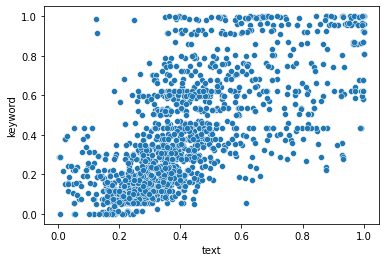

In [439]:
prob_df = pd.DataFrame()
prob_df['text'] = prob1
prob_df['keyword'] = prob2

sns.scatterplot(data=prob_df, x="text", y="keyword")

In [440]:
prediction = []

for val1,val2 in zip(prob1,prob2):
  if val1<.5 and val2<.6:
    prediction.append(0)
  else:
    prediction.append(1)

In [441]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, prediction))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       858
           1       0.80      0.64      0.71       653

    accuracy                           0.78      1511
   macro avg       0.78      0.76      0.77      1511
weighted avg       0.78      0.78      0.77      1511



In [442]:
'''test = pd.read_csv('https://raw.githubusercontent.com/chefhaider/Fake-News-Detection-Kaggle/main/test.csv')

predictions = clf.predict(tf_idf_mat_test)

tf_idf_mat_test = tf_idf_vect.transform(test['text'].values) # fit_transform vectorizer to dtest['text']

output = pd.DataFrame({'id': test.id, 'target': predictions})
output.to_csv('my_submission.csv', index=False)'''

"test = pd.read_csv('https://raw.githubusercontent.com/chefhaider/Fake-News-Detection-Kaggle/main/test.csv')\n\npredictions = clf.predict(tf_idf_mat_test)\n\ntf_idf_mat_test = tf_idf_vect.transform(test['text'].values) # fit_transform vectorizer to dtest['text']\n\noutput = pd.DataFrame({'id': test.id, 'target': predictions})\noutput.to_csv('my_submission.csv', index=False)"